<a href="https://colab.research.google.com/github/suryagokul/Data-Science-Portfolio/blob/master/Introduction_to_Tenserflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is TensorFlow?**
**TensorFlow is an open source software library released in 2015 by Google to make it easier for developers to design, build, and train deep learning models**.TensorFlow originated as an internal library that Google developers used to build models in-house, and we expect additional functionality to be added to the open source version as they are tested and vetted in the internal flavor. Although TensorFlow is only one of several options available to developers, we choose to use it here because of its thoughtful design and ease of use. We’ll briefly compare TensorFlow to alternatives in the next section.



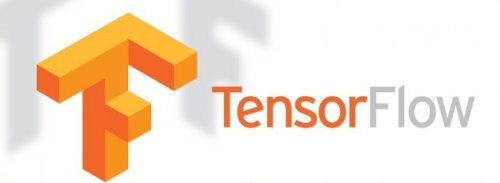


At a high level, TensorFlow is a Python library that allows users to express arbitrary computation as a graph of data flows. Nodes in this graph represent mathematical operations, whereas edges represent data that is communicated from one node to another. Data in TensorFlow are represented as tensors, which are multidimensional arrays. Although this framework for thinking about computation is valuable in many different fields, TensorFlow is primarily used for deep learning in practice and research.

## Installation
As usual, we'll be using Conda to install TensorFlow. You might already have a TensorFlow environment, but check to make sure you have all the necessary packages.

### OS X or Linux
Run the following commands to setup your environment:

    conda create -n tensorflow python=3.5
    source activate tensorflow
    conda install pandas matplotlib jupyter notebook scipy scikit-learn
    pip install tensorflow

### Windows
And installing on Windows. In your console or Anaconda shell,

    conda create -n tensorflow python=3.5
    activate tensorflow
    conda install pandas matplotlib jupyter notebook scipy scikit-learn
    pip install tensorflow


**Everyone have a doubt like what is tensors in tenserflow?**

>  A tensor is a multidimensional array of elements represented by a

A tensor is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes. Each element in the Tensor has the same data type, and the data type is always known

### Importing

Colab has two versions of TensorFlow pre-installed: a 2.x version and a 1.x version. Colab uses TensorFlow 2.x by default, though you can switch to 1.x by the method shown below.

In [1]:
#import tensorflow as tf
#tf.__version__               # By default colab preinstalled tf version 2.3.0

Running import tensorflow will import the default version (currently 2.x). You can use 1.x by running a cell with the tensorflow_version magic and restart runtime before you run import tensorflow.

In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


#### Once you have specified a version via this magic, you can run `import tensorflow` as normal and verify which version was imported as follows:

In [3]:
import tensorflow as tf
tf.__version__

'1.15.2'

If you want to switch TensorFlow versions after import, you will need to restart your runtime with 'Runtime' -> 'Restart runtime...' and then specify the version before you import it again.

**Writing Hello World in Tenserflow 1.x!**

1. In any Programming Language we first starts with writing Hello World Program.
2. It is very easy incase of python.But in Tensorflow 1.x it is slightly different. 

In [18]:
constant_str = tf.constant("Hello World!")             #When we represent as a constant then it can't be changed later..

constant_int  =  tf.constant(42)
                                      #Here constant_str and constant_int gives tensor object not the data.
constant_str ,constant_int                                      

(<tf.Tensor 'Const_13:0' shape=() dtype=string>,
 <tf.Tensor 'Const_14:0' shape=() dtype=int32>)

In [19]:
with tf.Session() as sess:                   # To see the data we must run the session.
  
  output1 = sess.run(constant_str)
  
  output2 = sess.run(constant_int)
  
  print(output1)
  
  print(output2)                     # output b represents format of  binary...

b'Hello World!'
42


### Session

TensorFlow’s api is built around the idea of a computational graph, a way of visualizing a mathematical process.  Let’s take the TensorFlow code and turn that into a graph:

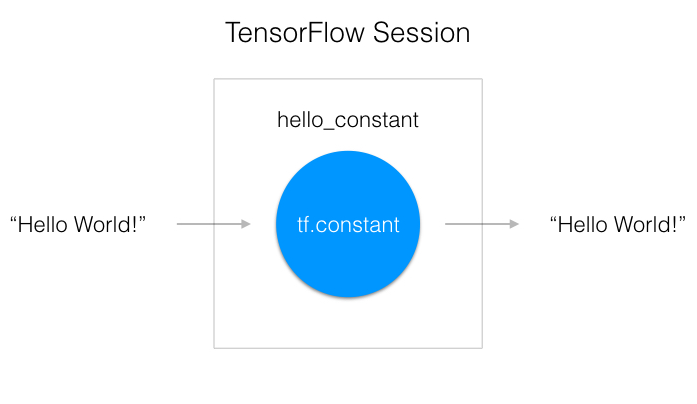

A session allows to execute graphs or part of graphs. It allocates resources (on one or more machines) for that and holds the actual values of intermediate results and variables.

### **Tensor**
In TensorFlow, data isn’t stored as integers, floats, or strings. These values are encapsulated in an object called a tensor. In the case of constant_str = tf.constant('Hello World!'), constant_str is a 0-dimensional string tensor, but tensors come in a variety of sizes as shown below:

In [30]:
A = tf.constant(1721542)

B = tf.constant([123,456,789])

C = tf.constant([  [12,23,45], [67,89,90]  ])

In [31]:
A,B,C               # Here shape of A -------->   0 Dimensional int32 tensor
                    #      shape of B -------->   1 Dimensional int32 tensor
                    #      shape of C -------->   2 Dimensional int32 tensor 

(<tf.Tensor 'Const_26:0' shape=() dtype=int32>,
 <tf.Tensor 'Const_27:0' shape=(3,) dtype=int32>,
 <tf.Tensor 'Const_28:0' shape=(2, 3) dtype=int32>)

## TensorFlow Input 

In the last section, a tensor was passed into a session and it returned the result. What if we want to use a non-constant? This is where `tf.placeholder()` and `feed_dict` come into place. In this section, we'll go over the basics of feeding data into TensorFlow.

### tf.placeholder()

Sadly you can’t just set `x` to your dataset and put it in TensorFlow, because over time you'll want your TensorFlow model to take in different datasets with different parameters. You need `tf.placeholder()`!

`tf.placeholder()` returns a tensor that gets its value from data passed to the `tf.session.run()` function, allowing you to set the input right before the session runs.

### Session's feed_dict

In [35]:
non_constant = tf.placeholder(dtype=tf.string)

with tf.Session() as sess:                   # To see the data we must run the session.
  
  op = sess.run(non_constant,feed_dict={non_constant:"SURYA"})
  
  print(op) 

SURYA


Use the feed_dict parameter in tf.session.run() to set the placeholder tensor. The above example shows the tensor non_constant being set to the string "Hello, world". It's also possible to set more than one tensor using feed_dict as shown below:

In [38]:
x = tf.placeholder(dtype=tf.string)

y = tf.placeholder(dtype=tf.int32)

z = tf.placeholder(dtype=tf.float32)

with tf.Session() as sess:                   # To see the data we must run the session.
  
  x = sess.run(x,feed_dict={x:"SURYA"})

  y = sess.run(y,feed_dict={y:42})

  z = sess.run(z,feed_dict={z:42.5})

  print(x)

  print(y)

  print(z) 

SURYA
42
42.5


### **Tenserflow Math**

We can do mathematical operations like addition,multiplication,subtraction and divison. We can do all operations which we had done in numpy....
(There's many more math functions you can check out in the [documentation](https://www.tensorflow.org/api_docs/python/math_ops/).)


**Addition**

In [41]:
def session(var):                                        # Creating session function to decrease usage of Session multiple times.. 

  with tf.Session() as sess:                   
  
    val = sess.run(var)
    
    print(val)

In [44]:
session(tf.add(2.5,5))

7.5


**Subtraction**

In [59]:
session(tf.subtract(7,5))      

session(tf.subtract(7.2,5.1))   

# session(tf.subtract(7,5.0))       If we give 7 and 5.0 it shows error.Because in the case of float and int x will be  float and y will be int.  

session(tf.subtract(7.0,5))         # But if we give 7.0 and 5 it will accept.

2
2.1
2.0


In [49]:
session(tf.add(20,tf.subtract(7,5)))    

22


**Casting**

In [64]:
# session(tf.subtract(7,5.0))  It can be resolved using casting.

session(tf.subtract(tf.constant(7),tf.cast(5.0,tf.int32)))

2


**Multiplication** and **Division**

In [66]:
session(tf.multiply(20,20))

400


In [70]:
session(tf.divide(tf.constant(10),tf.constant(2)))

5.0


## TensorFlow Linear Functions

The most common operation in neural networks is calculating the linear combination of inputs, weights, and biases. As a reminder, we can write the output of the linear operation as:

![](https://d17h27t6h515a5.cloudfront.net/topher/2017/February/58a4d8b3_linear-equation/linear-equation.gif)

Here, **W** is a matrix of the weights connecting two layers. The output **y**, the input **x**, and the biases **b** are all vectors.

### Weights and Bias in TensorFlow

The goal of training a neural network is to modify weights and biases to best predict the labels. In order to use weights and bias, you'll need a Tensor that can be modified. This leaves out `tf.placeholder()` and `tf.constant()`, since those Tensors can't be modified. This is where `tf.Variable` class comes in.

### tf.Variable() It is used to  initialize values first and we can update those values later.

In [72]:
x = tf.Variable(20)

The `tf.Variable` class creates a tensor with an initial value that can be modified, much like a normal Python variable. This tensor stores its state in the session, so you must initialize the state of the tensor manually. You'll use the `tf.global_variables_initializer()` function to initialize the state of all the Variable tensors:

In [99]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(x))
    

20


**tf.truncated_normal()**

In [102]:
fea = 5
lab = 7

trunc_norm = tf.Variable(tf.truncated_normal((fea,lab)))

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(trunc_norm))

[[ 1.0174091  -0.68554115 -1.1678758   0.7147184   1.2176203   0.94838524
   0.47036305]
 [-0.2774664   0.41453525 -0.21490999  0.03793343  1.419309   -0.1403281
   1.6310365 ]
 [-0.46935278 -0.51450735 -1.0681298   0.59276265  0.05876182 -0.7447537
   0.36223292]
 [-0.8297275  -0.09624388 -1.0486662   1.6573092   0.31369823  1.4028484
   0.38020274]
 [-1.9439965   1.145113    0.5728884  -1.5497867  -0.53912145  0.05984878
   0.41178265]]


Truncated Normal works as random function in numpy.Used to pick random values...

**tf.random_normal()**

In [113]:
fea = 5
lab = 7

random_norm = tf.Variable(tf.random_normal((fea,lab)))

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(random_norm))

[[ 0.02041591 -0.7896304   0.4348022   0.33706647 -1.396316    1.482475
  -2.503206  ]
 [-0.6001198  -0.17146105 -0.6652978   1.1317778  -0.57914937  1.2908552
  -0.43950468]
 [-0.44939226  0.18925637  0.32052577  1.0950911  -1.948123   -0.66881794
   0.5315208 ]
 [ 0.10599057 -0.23418161  0.01164143  0.6595765   0.08426555  0.72579813
   1.6277982 ]
 [-0.3872002   0.48250553 -0.42539915  0.7737247   0.92400813  0.8419278
   2.2847705 ]]


Truncated Normal outputs random values from a truncated normal distribution. The generated values follow a normal distribution with specified mean and standard deviation, except that values whose magnitude is more than 2 standard deviations from the mean are dropped and re-picked.**It selects random numbers from a truncated normal distribution whose mean is close to 0 and values are close to 0.**

Random Uniform outputs random values from a uniform distribution. The generated values follow a uniform distribution in the range [minval, maxval). The lower bound minval is included in the range, while the upper bound maxval is excluded.
**It selects random numbers from a normal distribution whose mean is close to 0, but values can be a bit further apart.**

***Visualization of Truncated_Normal and Random Normal***

In [103]:
import matplotlib.pyplot as plt

%matplotlib inline  

n = 500000
A = tf.truncated_normal((n,))
B = tf.random_normal((n,))
with tf.Session() as sess:
    a, b = sess.run([A, B])

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,  2063.,  2963.,  3383.,  4049.,  4720.,  5340.,
         5974.,  6677.,  7290.,  8436.,  9292., 10073., 10891., 11972.,
        12766., 13476., 14370., 15251., 15943., 16318., 16588., 16982.,
        17319., 17570., 17365., 17413., 17239., 16951., 16244., 15871.,
        15219., 14443., 13632., 12776., 12078., 10858., 10062.,  9232.,
         8375.,  7454.,  6763.,  5975.,  5289.,  4597.,  4015.,  3430.,
         2926.,  2087.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.]),
 array([-4.2  , -4.116, -4.032, -3.948, -3.864, -3.78 , -3.696, -3.612,
        -3.528, -3.444

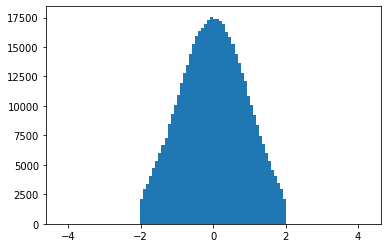

In [110]:
plt.hist(a,100,(-4.2, 4.2))       

(array([2.0000e+00, 3.0000e+00, 5.0000e+00, 5.0000e+00, 1.4000e+01,
        1.2000e+01, 1.1000e+01, 2.9000e+01, 4.4000e+01, 4.4000e+01,
        5.9000e+01, 7.6000e+01, 1.2700e+02, 1.3900e+02, 2.0000e+02,
        2.5800e+02, 3.1500e+02, 4.0500e+02, 5.0600e+02, 5.9100e+02,
        8.0300e+02, 9.5200e+02, 1.1590e+03, 1.3850e+03, 1.7160e+03,
        2.0040e+03, 2.2430e+03, 2.8690e+03, 3.2730e+03, 3.6640e+03,
        4.4190e+03, 4.9980e+03, 5.6730e+03, 6.4380e+03, 7.1060e+03,
        8.0690e+03, 8.8250e+03, 9.6390e+03, 1.0517e+04, 1.1189e+04,
        1.2103e+04, 1.2918e+04, 1.3650e+04, 1.4458e+04, 1.5062e+04,
        1.5722e+04, 1.6014e+04, 1.6424e+04, 1.6442e+04, 1.6815e+04,
        1.6793e+04, 1.6608e+04, 1.6281e+04, 1.6094e+04, 1.5759e+04,
        1.5001e+04, 1.4459e+04, 1.3587e+04, 1.3130e+04, 1.2171e+04,
        1.1484e+04, 1.0438e+04, 9.6950e+03, 8.8460e+03, 8.0500e+03,
        7.2280e+03, 6.5280e+03, 5.5440e+03, 4.9530e+03, 4.4270e+03,
        3.8570e+03, 3.2550e+03, 2.8340e+03, 2.44

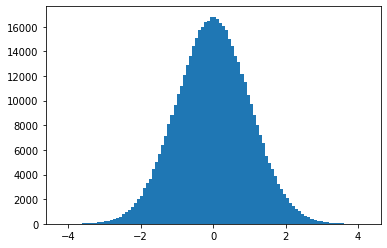

In [111]:
plt.hist(b,100,(-4.2, 4.2))

***tf.zeros()***

In [118]:
zeroes = tf.Variable(tf.zeros((5,3)))

In [119]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(zeroes))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


## TensorFlow Softmax

The softmax function squashes it's inputs, typically called **logits** or **logit scores**, to be between 0 and 1 and also normalizes the outputs such that they all sum to 1. This means the output of the softmax function is equivalent to a categorical probability distribution. It's the perfect function to use as the output activation for a network predicting multiple classes.


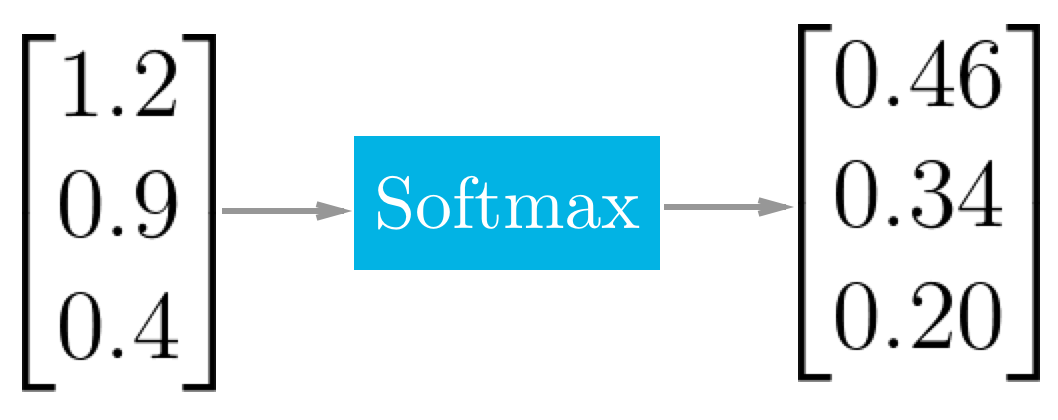


We're using TensorFlow to build neural networks and, appropriately, there's a function for calculating softmax.

In [121]:
probabilities = tf.nn.softmax([1.2,0.9,0.4])

In [122]:
with tf.Session() as sess:
    print(sess.run(probabilities))

[0.45659032 0.3382504  0.20515925]


In [123]:
0.45659032+0.3382504+0.20515925  # Is 100 % or 1 

0.9999999700000001

## One-Hot Encoding

Transforming your labels into one-hot encoded vectors is pretty simple with scikit-learn using `LabelBinarizer`. Check it out below!

## TensorFlow Cross Entropy

In the Intro to TFLearn lesson we discussed using cross entropy as the cost function for classification with one-hot encoded labels. Again, TensorFlow has a function to do the cross entropy calculations for us.


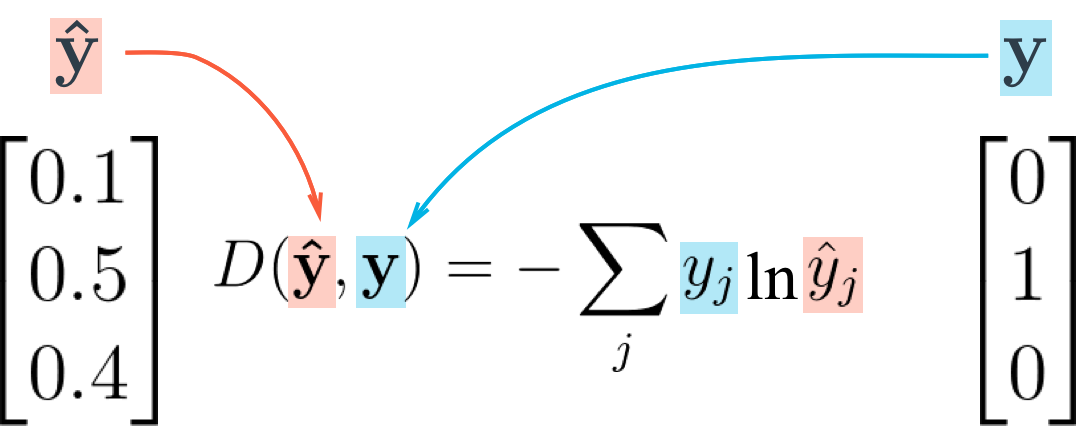

To create a cross entropy function in TensorFlow, you'll need to use two new functions:

* `tf.reduce_sum()`
* `tf.log()`

### Reduce Sum

In [125]:
r_s = tf.reduce_sum([1,2,3,4,5])

In [126]:
session(r_s)

15


****Log****

In [128]:
l = tf.log(10.0)        # Only allows floating points

In [129]:
session(l)

2.3025851


In [141]:
y = [0.0,1.0,0.0]

yhat = [0.1,0.5,0.4]

result = -tf.reduce_sum(tf.multiply(y,tf.log(yhat)))         # Based On Cross Entropy Formula........

In [142]:
session(result)

0.6931472


## Mini-batching


Mini-batching is a technique for training on subsets of the dataset instead of all the data at one time. This provides the ability to train a model, even if a computer lacks the memory to store the entire dataset.

Mini-batching is computationally inefficient, since you can't calculate the loss simultaneously across all samples. However, this is a small price to pay in order to be able to run the model at all.

It's also quite useful combined with SGD. The idea is to randomly shuffle the data at the start of each epoch, then create the mini-batches. For each mini-batch, you train the network weights with gradient descent. Since these batches are random, you're performing SGD with each batch.



## Epochs

An epoch is a single forward and backward pass of the whole dataset. This is used to increase the accuracy of the model without requiring more data. 